<table width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Exploratory Data Analysis (EDA) <br> New York Taxi Dataset </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Problem Statement

The competition dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC).Now recommend the existing taxi system to improve there services.

### File Description
- New_York_Taxi_data.csv - the training set (contains `1458644` trip observations)

### Data Fields
Basic Idea about the dataset is given below (features)

- `id` - a unique identifier for each trip.


- `vendor_id` - a code indicating the provider associated with the trip record.


- `pickup_datetime` - date and time when the meter was engaged.


- `dropoff_datetime` - date and time when the meter was disengaged.


- `passenger_count` - the number of passengers in the vehicle (driver entered value).


- `pickup_longitude` - the longitude where the meter was engaged.


- `pickup_latitude` - the latitude where the meter was engaged.


- `dropoff_longitude` - the longitude where the meter was disengaged.


- `dropoff_latitude` - the latitude where the meter was disengaged.


- `store_and_fwd_flag` - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.


- `trip_duration` - duration of the trip in seconds.


- `Disclaimer`: The decision was made to not remove dropoff coordinates from the dataset order to provide an expanded set of variables to use in Kernels.

### 1. Import Libraries

**Let us import the required libraries.**

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

## 2. Data Preparation

### 2.1 Understand the Data

#### Read the dataset and print the first five observations.

### Read The Data 

In [2]:
# load the csv file
# store the data in 'df_New_York_Taxi_data'
df_New_York_Taxi_data = pd.read_csv("New_York_Taxi_data.csv")

# display first five observations using head()
df_New_York_Taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


**Let us now see the number of variables and observations in the data.**

In [3]:
# use 'shape' to check the dimension of data
df_New_York_Taxi_data.shape

(1458644, 11)

**Interpretation:** The data has `1458644` observations and `11` variables.

In [4]:
# use 'columns' to check features of data
df_New_York_Taxi_data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

**Get a concise summary of the DataFrame.**

In [5]:
# use 'info()' to understand the dataset
df_New_York_Taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


**Interpretation:** The variable `id`,`pickup_datetime`,`dropoff_datetime`,`store_and_fwd_flag ` are categorical. All the other variables are numerical.

 From the above output, we see that the data type of `pickup_datetime`,`dropoff_datetime` are 'Object',But according to the data definition, `pickup_datetime`,`dropoff_datetime` are Date Time variable, which is wrongly interpreted as 'Object', so we will convert these variables data type to 'datetime'.

#### Change the data type as per the data definition.

### Describe the dataset

In [6]:
# use 'describe()' to understand the dataset
df_New_York_Taxi_data.describe().T

,count,mean,std,min,25%,50%,75%,max
vendor_id,1458644.000000,1.534950,0.498777,1.000000,1.000000,2.000000,2.000000,2.000000
passenger_count,1458644.000000,1.664530,1.314242,0.000000,1.000000,1.000000,2.000000,9.000000
pickup_longitude,1458644.000000,-73.973486,0.070902,-121.933342,-73.991867,-73.981743,-73.967331,-61.335529
pickup_latitude,1458644.000000,40.750921,0.032881,34.359695,40.737347,40.754101,40.768360,51.881084
dropoff_longitude,1458644.000000,-73.973416,0.070643,-121.933304,-73.991325,-73.979752,-73.963013,-61.335529
dropoff_latitude,1458644.000000,40.751800,0.035891,32.181141,40.735885,40.754524,40.769810,43.921028
trip_duration,1458644.000000,959.492273,5237.431724,1.000000,397.000000,662.000000,1075.000000,3526282.000000


**Interpretation:**

Here in this dataset `trip_duration`(Thaa feature contain the outliers(huge diffrence between mean and median(50%))

**Conclusion After Overview**

- There are 1458644 observation and 11 features
- pickup_datetime and dropoff_datetime need to be in datetime datatype
- we need to work on vendor_id feature

- There is no null values 

#### Action 

In [7]:
# use value_counts() to find distinct valuse in feature
df_New_York_Taxi_data.vendor_id.value_counts()

2    780302
1    678342
Name: vendor_id, dtype: int64

Here we have only two `vendor_id` so let's convert it into categories .

In [8]:
# use astype() to change the data type
df_New_York_Taxi_data.vendor_id = df_New_York_Taxi_data.vendor_id.astype('object')

**Interpretation:** Now, all the variables have the correct data type.

###  Remove Insignificant Variables

The column `id` contains the id of the trip, which is redundant for further analysis. Thus, we drop the column.

In [9]:
# drop the column 'id' using drop()
# 'axis = 1' drops the specified column
df_New_York_Taxi_data = df_New_York_Taxi_data.drop("id",axis=1)

## Missing Value Analysis and Treatment

**Check the presence of missing values in the data and treat them.**

In [10]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df_New_York_Taxi_data.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_New_York_Taxi_data.isnull().sum()*100/df_New_York_Taxi_data.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
trip_duration,0,0.000000
store_and_fwd_flag,0,0.000000
dropoff_latitude,0,0.000000
dropoff_longitude,0,0.000000
pickup_latitude,0,0.000000
pickup_longitude,0,0.000000
passenger_count,0,0.000000
dropoff_datetime,0,0.000000
pickup_datetime,0,0.000000
vendor_id,0,0.000000


**Interpretation:** There are no missing values in the data.

### Outlier Analysis and Treatment

**Check the outliers in all the variables and treat them using appropriate techniques.**

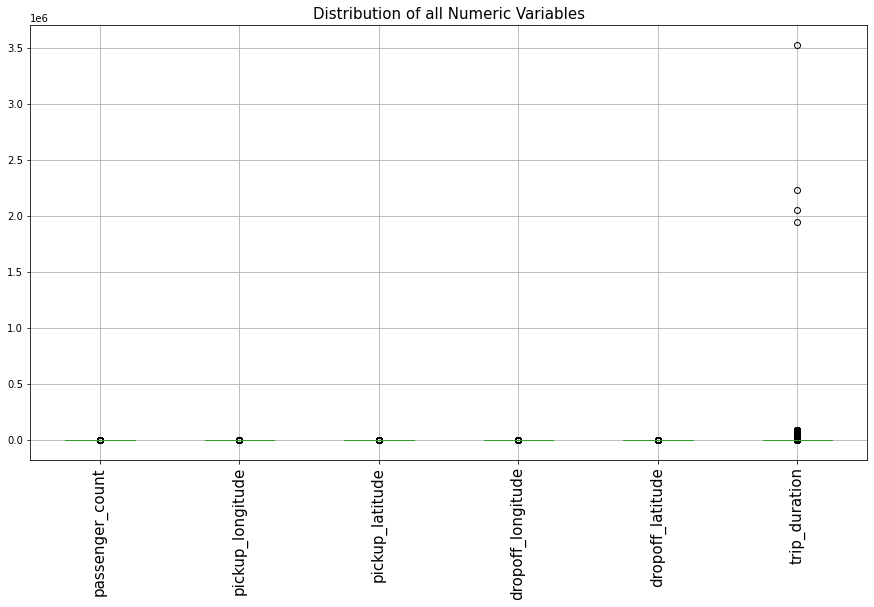

In [11]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (15,8))

# plot a boxplot to visualize the outliers in all the numeric variables
df_New_York_Taxi_data.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

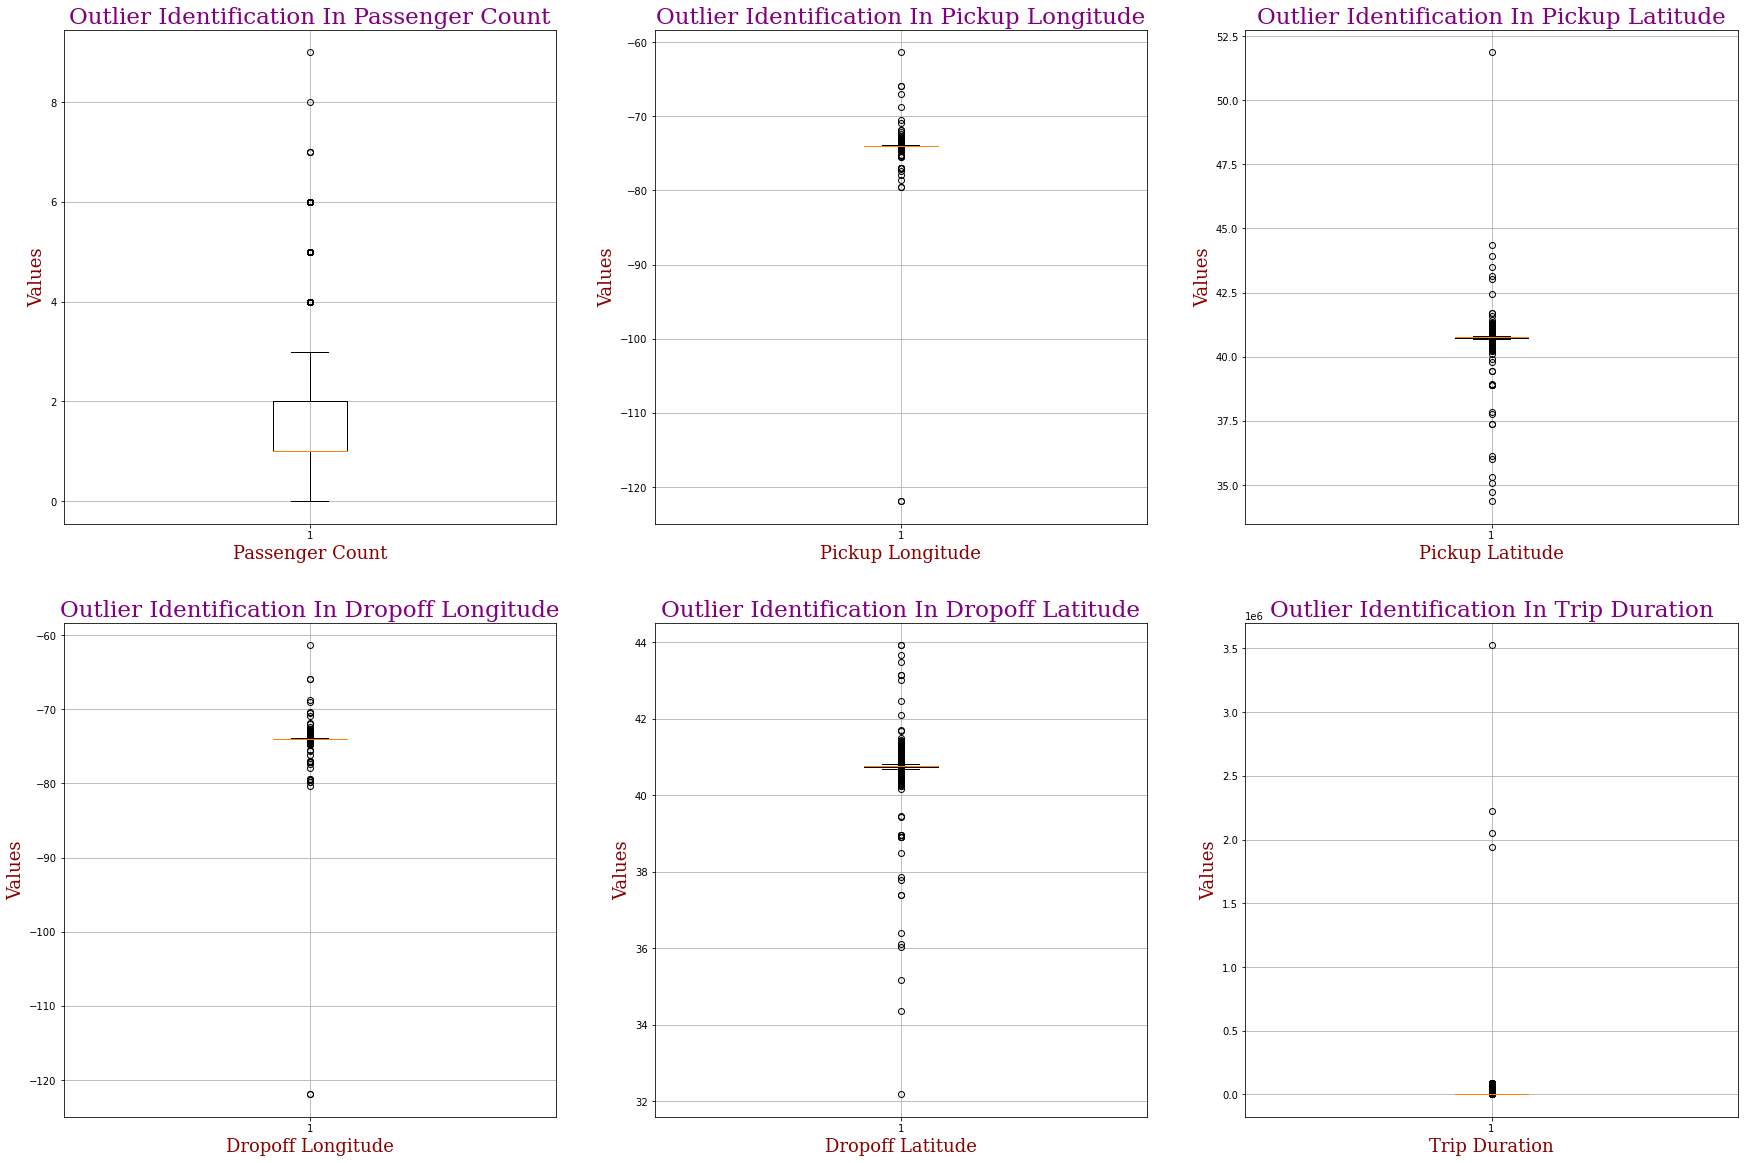

In [12]:
# Outlier Identification 

# Set font style for x_label & y_label
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 18,
        }

# Set font style for title
font_one = {'family': 'serif',
        'color':  'purple',
        'weight': 'normal',
        'size': 23,
        }

# Set figure size 
plt.figure(figsize=(30,20))

# Use the subplots for convinant 
# Passenger Count feature 
plt.subplot(2, 3, 1)
# Plot the boxplot
plt.boxplot(df_New_York_Taxi_data.passenger_count)
#  Label to X axis
plt.xlabel("Passenger Count",fontdict=font)
#  Label to Y axis
plt.ylabel("Values",fontdict=font)
# Set the Grid
plt.grid()
# Give title
plt.title("Outlier Identification In Passenger Count",fontdict=font_one,loc='center')

# Pickup Longitude feature
plt.subplot(2, 3, 2)
# Plot the boxplot
plt.boxplot(df_New_York_Taxi_data.pickup_longitude,)
#  Label to X axis
plt.xlabel("Pickup Longitude",fontdict=font)
#  Label to Y axis
plt.ylabel("Values",fontdict=font)
# Set the Grid
plt.grid()
# Give title
plt.title("Outlier Identification In Pickup Longitude",fontdict=font_one,loc='center')

# Pickup Latitude feature
plt.subplot(2, 3, 3)
# Plot the boxplot
plt.boxplot(df_New_York_Taxi_data.pickup_latitude)
#  Label to X axis
plt.xlabel("Pickup Latitude",fontdict=font)
#  Label to Y axis
plt.ylabel("Values",fontdict=font)
# Set the Grid
plt.grid()
# Give title
plt.title("Outlier Identification In Pickup Latitude",fontdict=font_one,loc='center')

# Dropoff Longitude feature
plt.subplot(2, 3, 4)
# Plot the boxplot
plt.boxplot(df_New_York_Taxi_data.dropoff_longitude)
#  Label to X axis
plt.xlabel("Dropoff Longitude",fontdict=font)
#  Label to Y axis
plt.ylabel("Values",fontdict=font)
# Set the Grid
plt.grid()
# Give title
plt.title("Outlier Identification In Dropoff Longitude",fontdict=font_one,loc='center')


# Dropoff Latitude feature
plt.subplot(2, 3, 5)
# Plot the box plot
plt.boxplot(df_New_York_Taxi_data.dropoff_latitude)
# Label to X Axis
plt.xlabel("Dropoff Latitude",fontdict=font)
# Label to Y Axis
plt.ylabel("Values",fontdict=font)
# Set a Grid
plt.grid()
# Give Title
plt.title("Outlier Identification In Dropoff Latitude",fontdict=font_one,loc='center')


# Trip Duration feature
plt.subplot(2, 3, 6)
# Plot a Box Plot
plt.boxplot(df_New_York_Taxi_data.trip_duration)
# Label X axis
plt.xlabel("Trip Duration",fontdict=font)
# Label Y Axis
plt.ylabel("Values",fontdict=font)
# Set the grid
plt.grid()
# Give Title
plt.title("Outlier Identification In Trip Duration",fontdict=font_one,loc='center')

plt.show()

#### Interpretation 
- `pickup_longitude`, `pickup_latitude`, `dropoff_longitude`, `dropoff_latitude` These are the coordinate of any perticular location so it wont make sense to handel in the columns. 
- `trip_duration` is target variable so again we can not process the target
- `passenger_count` as we know US goverment follow some protocal for passenger safety max to max 6 people can travel at a time in a texi.

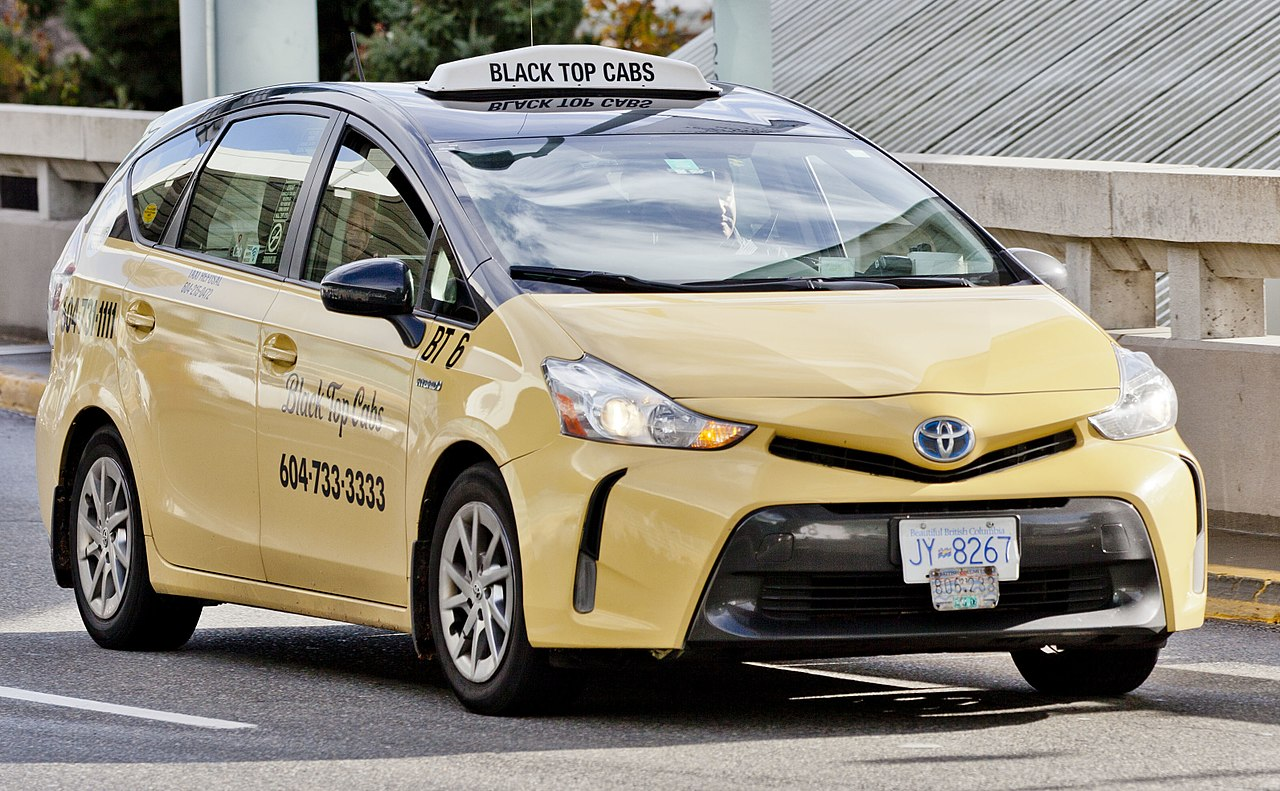

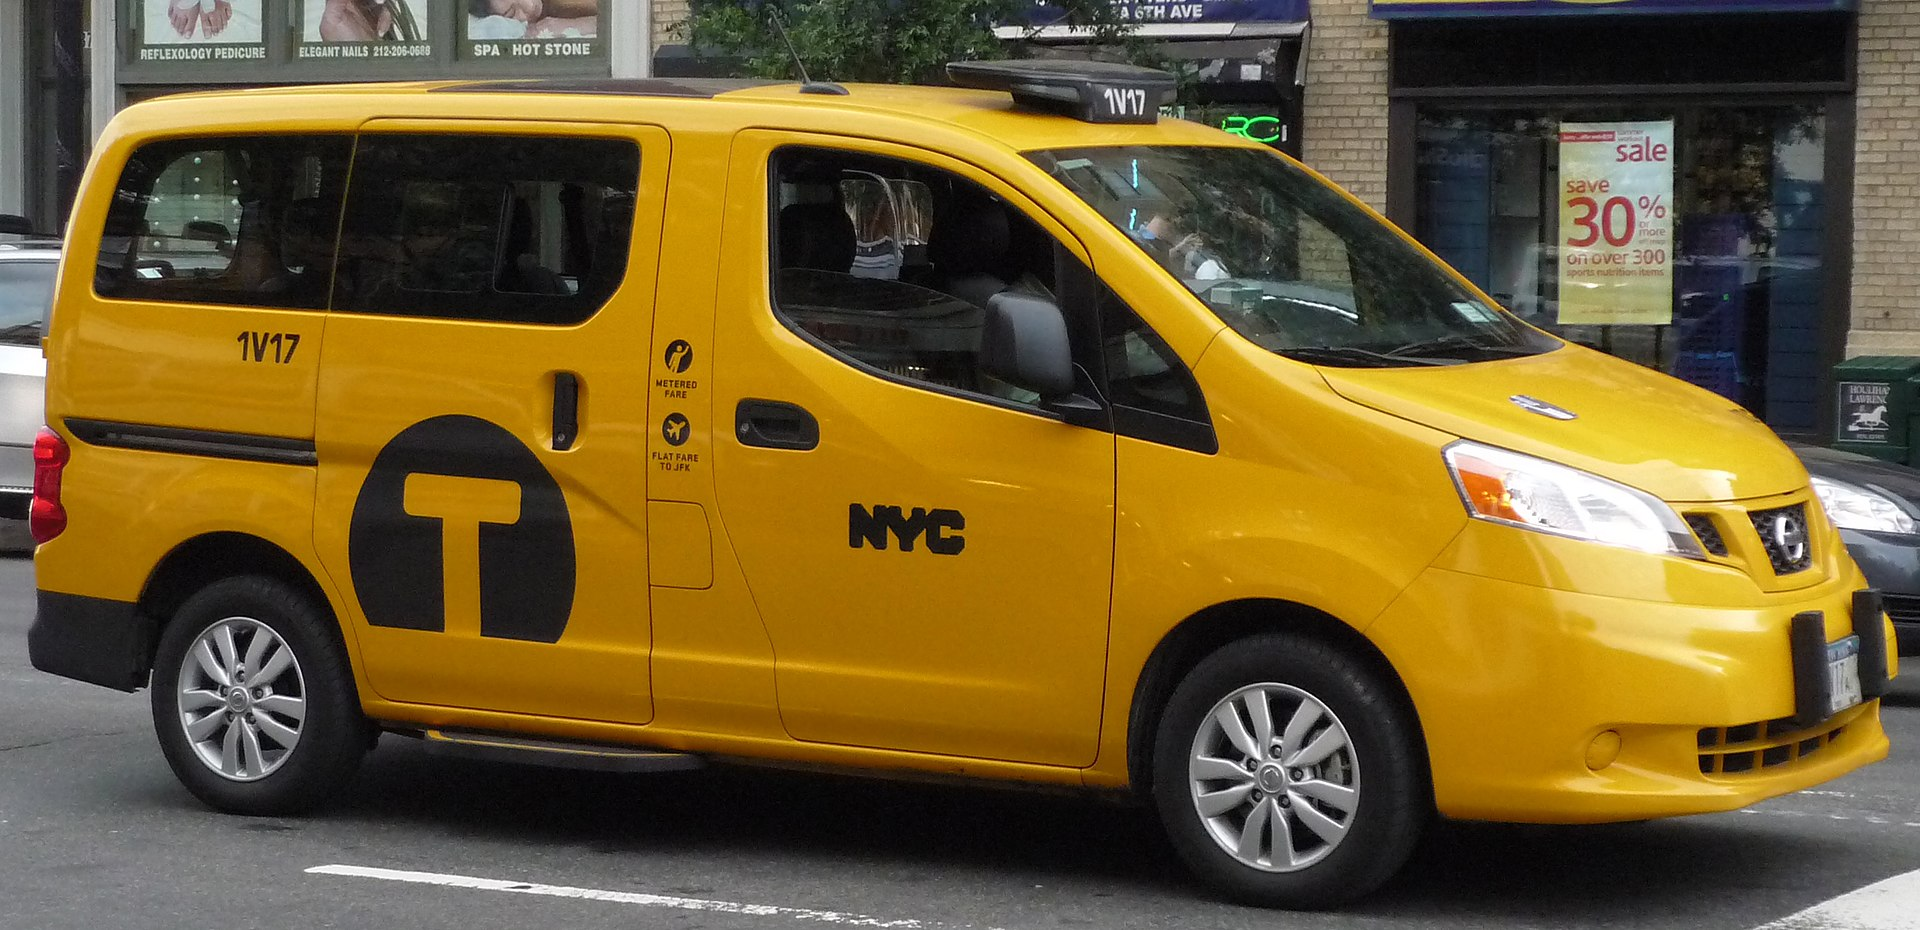

In [13]:
from IPython.display import Image
from IPython.display import display

x = Image(filename='1280px-Toyota_PriusV_hybrid_taxi.jpg',width=500, height=500) 
y = Image(filename='NYC_Taxi_Nissan_NV200.jpg',width=500, height=500) 
display(x, y)

- First car Use As texi in 2016 as we can see in first car carry 1 to 3 people at time .
- Second car Use As texi in 2016 as we can see in second car carry 1 to 6 people at time .

# Exploratory Data Analysis(EDA)

In [14]:
df_New_York_Taxi_data.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


## Univrient Analysis

### vendor_id

In [15]:
df_New_York_Taxi_data.vendor_id.value_counts()

2    780302
1    678342
Name: vendor_id, dtype: int64

Here you can see there is two category in vendor_id so we genrate the count plot

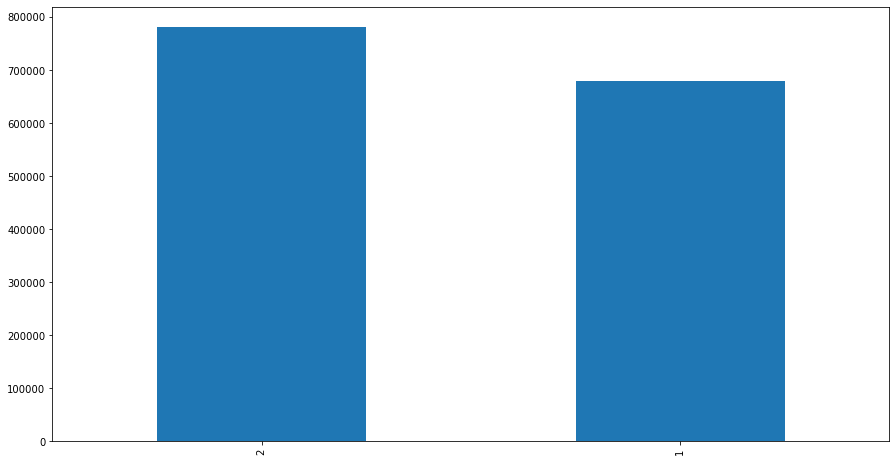

In [16]:
df_New_York_Taxi_data.vendor_id.value_counts().plot(kind = 'bar')
plt.show()

After favourable research we found the code is indicating the LPEP provider that provided the record. 1= `Creative Mobile Technologies`, LLC; 2= `VeriFone Inc` for e-payment gateway in USA in 2016.

In [17]:
df_New_York_Taxi_data.vendor_id.replace({1:'Creative Mobile Technologies',2:'VeriFone Inc'},inplace=True)

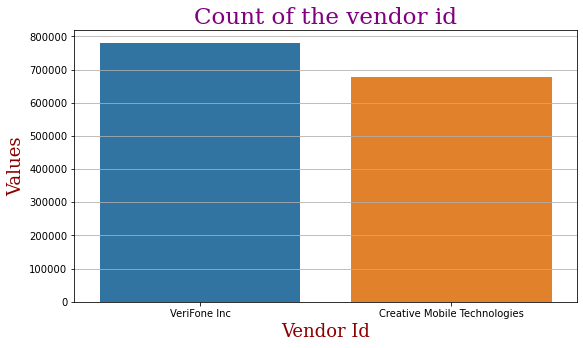

In [18]:
# Let's plot the vendor_id 
plt.figure(figsize=(9,5))
sns.countplot(df_New_York_Taxi_data.vendor_id)
plt.xlabel("Vendor Id",fontdict=font)
plt.ylabel("Values",fontdict=font)
plt.grid(which='major', axis='y', zorder=-1.0)
plt.title("Count of the vendor id",fontdict=font_one,loc='center')
plt.show()

After seen this we can easyly say that Passengers are quite good familier with both e-payment getways.

### store_and_fwd_flag

In [19]:
df_New_York_Taxi_data.store_and_fwd_flag.value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

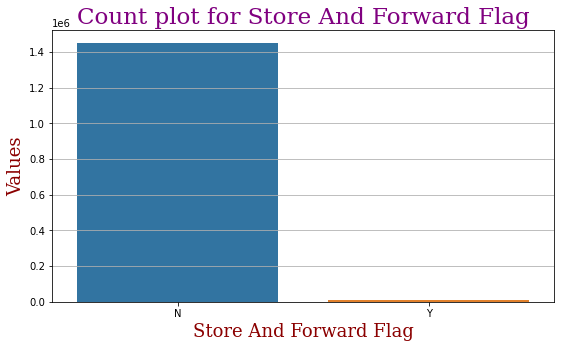

In [20]:
# Plot 
plt.figure(figsize=(9,5))
sns.countplot(df_New_York_Taxi_data.store_and_fwd_flag)
plt.xlabel("Store And Forward Flag",fontdict=font)
plt.ylabel("Values",fontdict=font)
plt.grid(which='major', axis='y', zorder=-1.0)
plt.title("Count plot for Store And Forward Flag",fontdict=font_one,loc='center')
plt.show()

This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server and here maximum taxis not have a store and forward trip

### trip_duration

**Let's How target variable is Behaving**

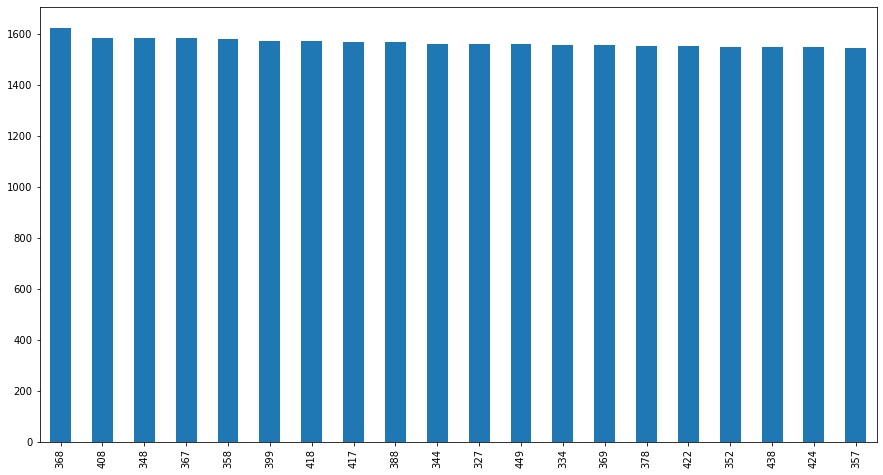

In [21]:
df_New_York_Taxi_data.trip_duration.value_counts().head(20).plot(kind = "bar")
plt.show()

### pickup_datetime

In [22]:
# Split the values according to our requirement
# Saperate the Time
df_New_York_Taxi_data['pickup_Time']=df_New_York_Taxi_data['pickup_datetime'].str.split(" ").str[1]
# Saperate date
df_New_York_Taxi_data['pickup_Date']=df_New_York_Taxi_data['pickup_datetime'].str.split(" ").str[0]
# Covert for datatype
df_New_York_Taxi_data['pickup_Date']= pd.to_datetime(df_New_York_Taxi_data['pickup_Date'])

In [23]:
# saperate the month
df_New_York_Taxi_data['pickup_month']= df_New_York_Taxi_data['pickup_Date'].dt.month
# saperate the day
df_New_York_Taxi_data['pickup_day']= df_New_York_Taxi_data['pickup_Date'].dt.day
# map the Month in terms of words
df_New_York_Taxi_data.pickup_month.replace({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June'},inplace=True)
# Show the top 5 records
df_New_York_Taxi_data.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_Time,pickup_Date,pickup_month,pickup_day
0,VeriFone Inc,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17:24:55,2016-03-14,March,14
1,Creative Mobile Technologies,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,00:43:35,2016-06-12,June,12
2,VeriFone Inc,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11:35:24,2016-01-19,January,19
3,VeriFone Inc,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19:32:31,2016-04-06,April,6
4,VeriFone Inc,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13:30:55,2016-03-26,March,26


**Here in data, time is given so based on time we can easily map the day period.**

In [24]:
# For AM PM
pickup_time = list(df_New_York_Taxi_data.pickup_Time)
pickup_time_am_pm = pd.Series([pickup_time[i][0:5] for i in range(len(pickup_time))])
new_three_pick_up=[pickup_time_am_pm[i].replace(':','.') for i in range(len(pickup_time_am_pm))]
type_coversion_pick_up=list(map(float, new_three_pick_up))

for_am_pm_pickup_time= []
for i in type_coversion_pick_up:
    if i >=0.0 and i<12.0:
        for_am_pm_pickup_time.append("AM")
    else:
        for_am_pm_pickup_time.append("PM")
        
for_am_pm_pickup_time_series = pd.Series(for_am_pm_pickup_time,name="pickup_period")

df_New_York_Taxi_data = pd.concat([df_New_York_Taxi_data,for_am_pm_pickup_time_series],axis=1)
df_New_York_Taxi_data.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_Time,pickup_Date,pickup_month,pickup_day,pickup_period
0,VeriFone Inc,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17:24:55,2016-03-14,March,14,PM
1,Creative Mobile Technologies,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,00:43:35,2016-06-12,June,12,AM
2,VeriFone Inc,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11:35:24,2016-01-19,January,19,AM
3,VeriFone Inc,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19:32:31,2016-04-06,April,6,PM
4,VeriFone Inc,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13:30:55,2016-03-26,March,26,PM


Now Time is to plot all new featurs that we created using Feature Engineering

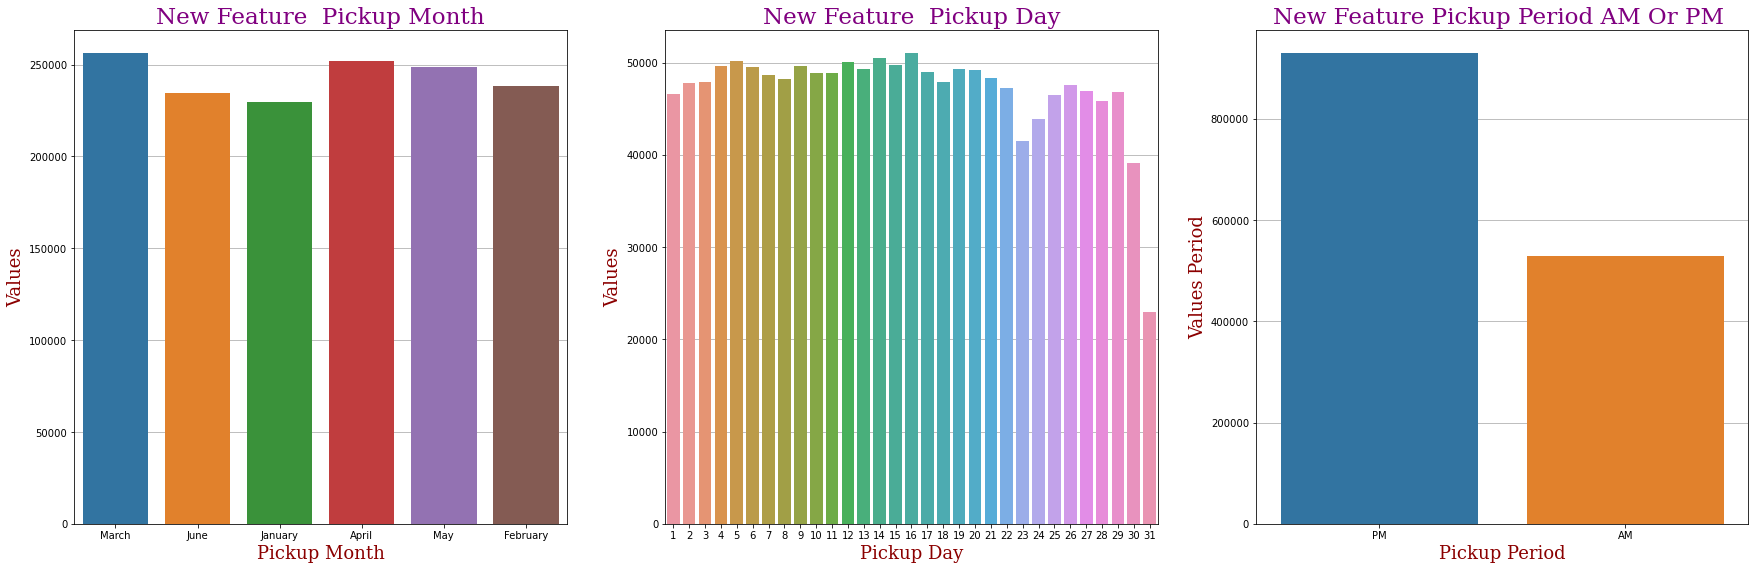

In [25]:
# Set figure size 
plt.figure(figsize=(30,20))

# Use the subplots for convinant 
# Passenger Count feature 
ax=plt.subplot(2, 3, 1)
sns.countplot(df_New_York_Taxi_data.pickup_month)
plt.xlabel("Pickup Month",fontdict=font)
plt.ylabel("Values",fontdict=font)
ax.yaxis.grid()  # grid lines
ax.set_axisbelow(True) 
plt.title("New Feature  Pickup Month",fontdict=font_one,loc='center')

# Pickup Longitude feature
ax=plt.subplot(2, 3, 2)
sns.countplot(df_New_York_Taxi_data.pickup_day)
plt.xlabel("Pickup Day",fontdict=font)
plt.ylabel("Values",fontdict=font)
ax.yaxis.grid()  # grid lines
ax.set_axisbelow(True) 
plt.title("New Feature  Pickup Day",fontdict=font_one,loc='center')

# Pickup Latitude feature
ax=plt.subplot(2, 3, 3)
sns.countplot(df_New_York_Taxi_data.pickup_period)
plt.xlabel("Pickup Period",fontdict=font)
plt.ylabel("Values Period",fontdict=font)
ax.yaxis.grid()
ax.set_axisbelow(True) 
plt.title("New Feature Pickup Period AM Or PM ",fontdict=font_one,loc='center')


plt.show()


### dropoff_datetime

Apply the same procces on Dropoff and visualized the ne features.

In [26]:
df_New_York_Taxi_data['dropoff_Time']=df_New_York_Taxi_data['dropoff_datetime'].str.split(" ").str[1]
df_New_York_Taxi_data['dropoff_Date']=df_New_York_Taxi_data['dropoff_datetime'].str.split(" ").str[0]
df_New_York_Taxi_data['dropoff_Date']= pd.to_datetime(df_New_York_Taxi_data['dropoff_Date'])

In [27]:
df_New_York_Taxi_data['dropoff_month']= df_New_York_Taxi_data['dropoff_Date'].dt.month
df_New_York_Taxi_data['dropoff_day']= df_New_York_Taxi_data['dropoff_Date'].dt.day
df_New_York_Taxi_data.dropoff_month.replace({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July'},inplace=True)
df_New_York_Taxi_data.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_Time,pickup_Date,pickup_month,pickup_day,pickup_period,dropoff_Time,dropoff_Date,dropoff_month,dropoff_day
0,VeriFone Inc,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17:24:55,2016-03-14,March,14,PM,17:32:30,2016-03-14,March,14
1,Creative Mobile Technologies,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,00:43:35,2016-06-12,June,12,AM,00:54:38,2016-06-12,June,12
2,VeriFone Inc,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11:35:24,2016-01-19,January,19,AM,12:10:48,2016-01-19,January,19
3,VeriFone Inc,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19:32:31,2016-04-06,April,6,PM,19:39:40,2016-04-06,April,6
4,VeriFone Inc,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13:30:55,2016-03-26,March,26,PM,13:38:10,2016-03-26,March,26


In [28]:
# For AM PM

dropoff_time = list(df_New_York_Taxi_data.dropoff_Time)
dropoff_time_am_pm = pd.Series([dropoff_time[i][0:5] for i in range(len(dropoff_time))])
new_three_drop_off=[dropoff_time_am_pm[i].replace(':','.') for i in range(len(dropoff_time_am_pm))]
type_coversion_drop_off=list(map(float, new_three_drop_off))

for_am_pm_dropoff_time= []
for i in type_coversion_drop_off:
    if i >=0.0 and i<12.0:
        for_am_pm_dropoff_time.append("AM")
    else:
        for_am_pm_dropoff_time.append("PM")
        
for_am_pm_dropoff_time_series = pd.Series(for_am_pm_dropoff_time,name="dropoff_period")

df_New_York_Taxi_data = pd.concat([df_New_York_Taxi_data,for_am_pm_dropoff_time_series],axis=1)
df_New_York_Taxi_data.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_Time,pickup_Date,pickup_month,pickup_day,pickup_period,dropoff_Time,dropoff_Date,dropoff_month,dropoff_day,dropoff_period
0,VeriFone Inc,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17:24:55,2016-03-14,March,14,PM,17:32:30,2016-03-14,March,14,PM
1,Creative Mobile Technologies,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,00:43:35,2016-06-12,June,12,AM,00:54:38,2016-06-12,June,12,AM
2,VeriFone Inc,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11:35:24,2016-01-19,January,19,AM,12:10:48,2016-01-19,January,19,PM
3,VeriFone Inc,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19:32:31,2016-04-06,April,6,PM,19:39:40,2016-04-06,April,6,PM
4,VeriFone Inc,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13:30:55,2016-03-26,March,26,PM,13:38:10,2016-03-26,March,26,PM


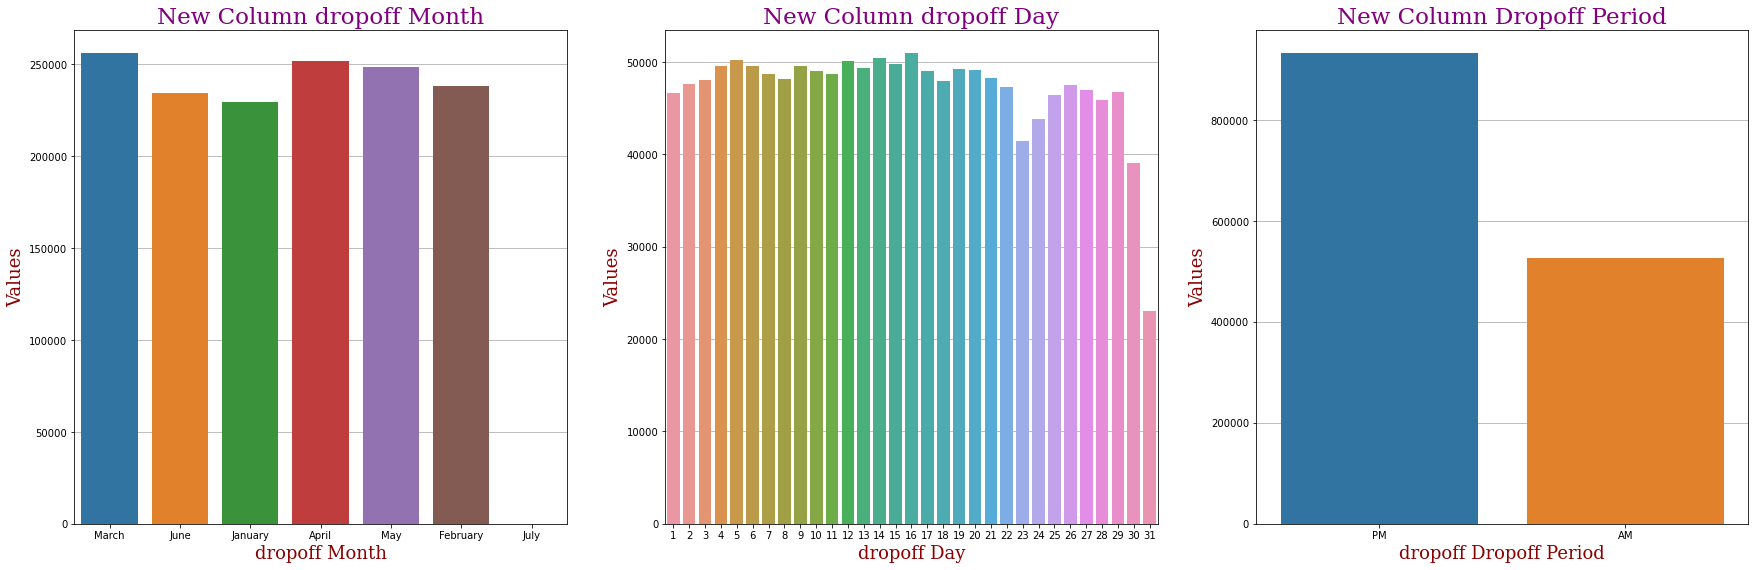

In [29]:
# Set figure size 
plt.figure(figsize=(30,20))

# Use the subplots for convinant 
# Passenger Count feature 
ax=plt.subplot(2, 3, 1)
sns.countplot(df_New_York_Taxi_data.dropoff_month)
plt.xlabel("dropoff Month",fontdict=font)
plt.ylabel("Values",fontdict=font)
ax.yaxis.grid()  # grid lines
ax.set_axisbelow(True) 
plt.title("New Column dropoff Month",fontdict=font_one,loc='center')

# dropoff Longitude feature
ax=plt.subplot(2, 3, 2)
sns.countplot(df_New_York_Taxi_data.dropoff_day)
plt.xlabel("dropoff Day",fontdict=font)
plt.ylabel("Values",fontdict=font)
ax.yaxis.grid()  # grid lines
ax.set_axisbelow(True) 
plt.title("New Column dropoff Day",fontdict=font_one,loc='center')

# dropoff Latitude feature
ax=plt.subplot(2, 3, 3)
sns.countplot(df_New_York_Taxi_data.dropoff_period)
plt.xlabel("dropoff Dropoff Period",fontdict=font)
plt.ylabel("Values",fontdict=font)
ax.yaxis.grid()
ax.set_axisbelow(True) 
plt.title("New Column Dropoff Period",fontdict=font_one,loc='center')


plt.show()


### passenger_count

In [30]:
df_New_York_Taxi_data.passenger_count.value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

Let's generate the count plot for passanger count

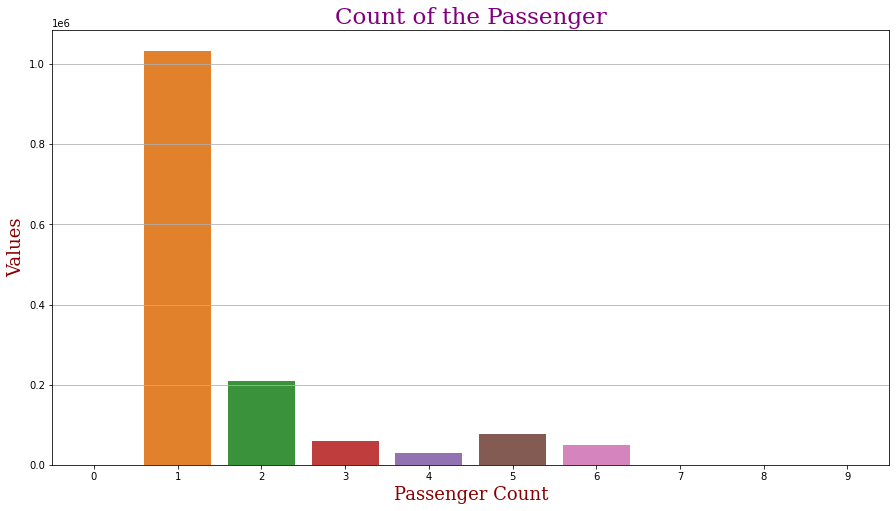

In [31]:
#plt.figure(figsize=(9,5))
sns.countplot(df_New_York_Taxi_data.passenger_count)
plt.xlabel("Passenger Count",fontdict=font)
plt.ylabel("Values",fontdict=font)
plt.grid(which='major', axis='y', zorder=-1.0)
plt.title("Count of the Passenger",fontdict=font_one,loc='center')
plt.show()

After seen this chart we can say that most of the people traval alone.

**As we see here 7,8,9 passenger taxis booking happen for very less no of time, also USA Trafic norms we cannot took ride for more then 6 people at a time in 6 siter car.**

In [32]:
# Drop those records
df_New_York_Taxi_data.drop(df_New_York_Taxi_data[df_New_York_Taxi_data['passenger_count'] == 0 ].index, inplace = True)
df_New_York_Taxi_data.drop(df_New_York_Taxi_data[df_New_York_Taxi_data['passenger_count'] == 7 ].index, inplace = True)
df_New_York_Taxi_data.drop(df_New_York_Taxi_data[df_New_York_Taxi_data['passenger_count'] == 9 ].index, inplace = True)
df_New_York_Taxi_data.drop(df_New_York_Taxi_data[df_New_York_Taxi_data['passenger_count'] == 8 ].index, inplace = True)

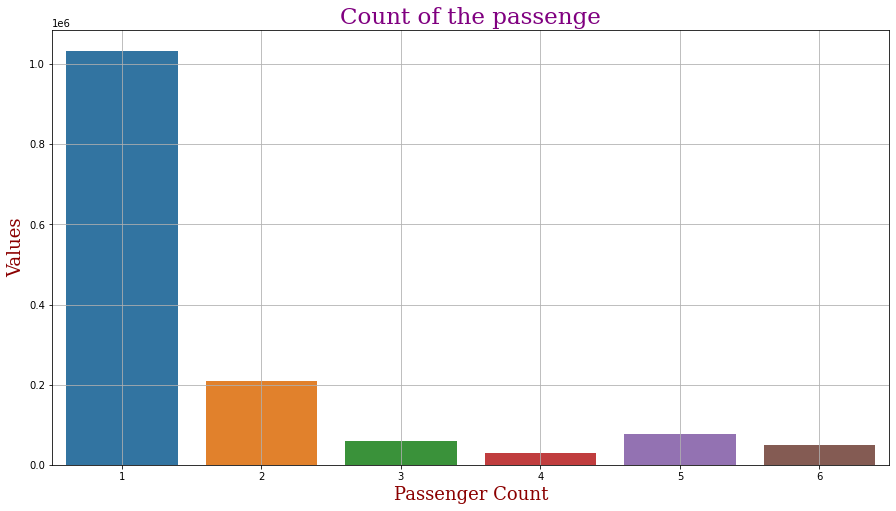

In [33]:
# Plot them again
#plt.figure(figsize=(9,5))
sns.countplot(df_New_York_Taxi_data.passenger_count)
plt.xlabel("Passenger Count",fontdict=font)
plt.ylabel("Values",fontdict=font)
plt.grid()
plt.title("Count of the passenge",fontdict=font_one,loc='center')
plt.show()

## Bivariant Analysis 

By using co-relation maxtrix we can easly justify bivariant analysis 

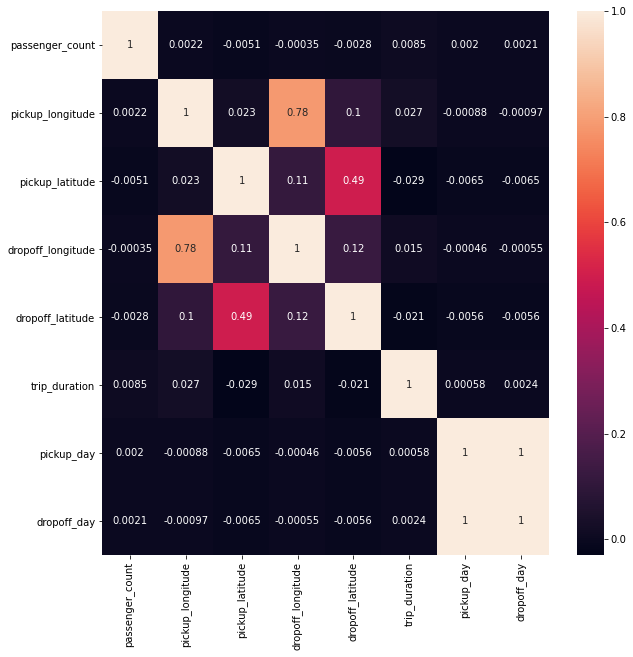

In [35]:
# Corr Matrix Using Heat map

plt.figure(figsize=(10,10))
sns.heatmap(df_New_York_Taxi_data.corr(),annot=True)
plt.show()

#### Passenger count variation based on days.
find weither there is any relation between passenger coun in any perticuler day of week.

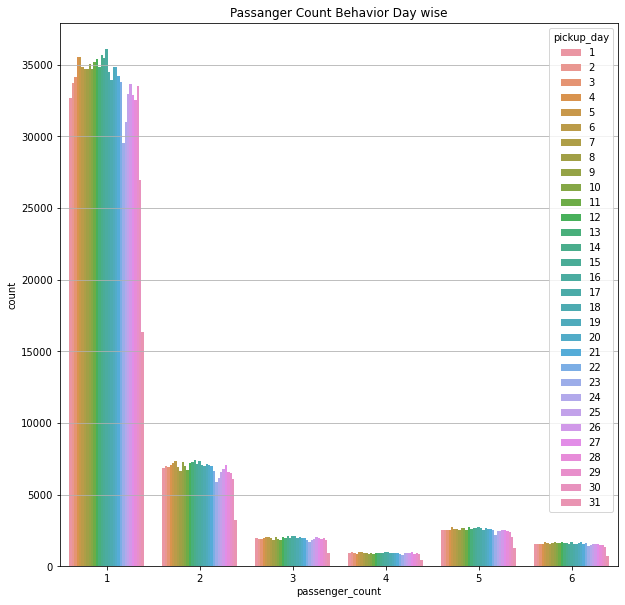

In [36]:
# Plot the relation
plt.figure(figsize=(10,10))
plt.title("Passanger Count Behavior Day wise")
sns.countplot(x=df_New_York_Taxi_data.passenger_count, hue=df_New_York_Taxi_data.pickup_day)
plt.grid(which='major', axis='y', zorder=-1.0)
plt.show()

- As we can see here Most People Traveling Alon Also Comapny Need's to Wrok On Advartisement of group traveling .
- As we see here the passanger count 5 or more then 5 most people opt for second car 

#### Lets see how much hr's will taken to traval 

In [39]:
df_New_York_Taxi_data["time_duration_hr"] = pd.to_datetime(df_New_York_Taxi_data.dropoff_datetime) - pd.to_datetime(df_New_York_Taxi_data.pickup_datetime)
df_New_York_Taxi_data.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_Time,pickup_Date,pickup_month,pickup_day,pickup_period,dropoff_Time,dropoff_Date,dropoff_month,dropoff_day,dropoff_period,time_duration_hr
0,VeriFone Inc,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17:24:55,2016-03-14,March,14,PM,17:32:30,2016-03-14,March,14,PM,0 days 00:07:35
1,Creative Mobile Technologies,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,00:43:35,2016-06-12,June,12,AM,00:54:38,2016-06-12,June,12,AM,0 days 00:11:03
2,VeriFone Inc,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11:35:24,2016-01-19,January,19,AM,12:10:48,2016-01-19,January,19,PM,0 days 00:35:24
3,VeriFone Inc,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19:32:31,2016-04-06,April,6,PM,19:39:40,2016-04-06,April,6,PM,0 days 00:07:09
4,VeriFone Inc,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13:30:55,2016-03-26,March,26,PM,13:38:10,2016-03-26,March,26,PM,0 days 00:07:15


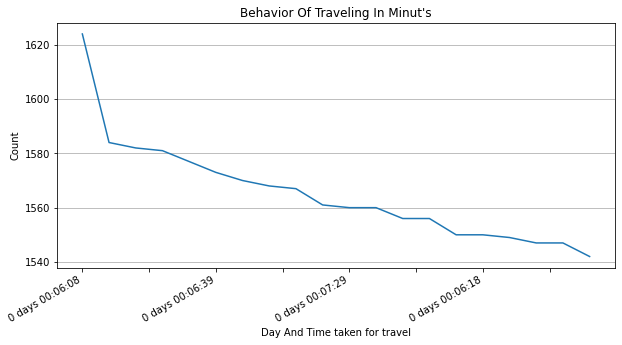

In [40]:
# Check the behavior of time duration 
# As we can see we have total 14 lakh of data, So to avoide messey dataview we consideres first 20 records
plt.figure(figsize=(10,5))
df_New_York_Taxi_data.time_duration_hr.value_counts().head(20).plot(kind='line')
plt.title("Behavior Of Traveling In Minut's")
plt.xlabel("Day And Time taken for travel")
plt.ylabel("Count")
plt.grid(which='major', axis='y', zorder=-1.0)
plt.show()

- As we see here most pople take ride for very less time(4 min to 6 min)

#### Find is there any relation between no of passenger and trip time

<Figure size 720x360 with 0 Axes>

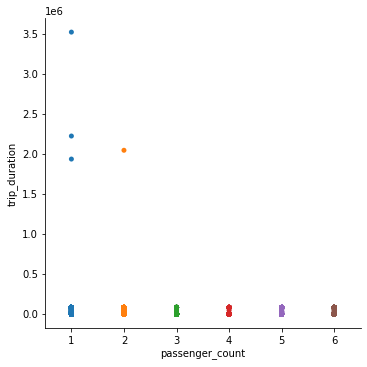

In [41]:
# Trip Duration vs Passenger count
plt.figure(figsize=(10,5))
sns.catplot(x="passenger_count",y="trip_duration",jitter=False,data=df_New_York_Taxi_data)
plt.show()

- As we See here the people who book texis for long time mostly they are traveling alone

#### Find in any perticuler month is there any good no of rides are taken

- find in which month trip duration was heigherst 
- in which month logest drive happen 

<Figure size 720x360 with 0 Axes>

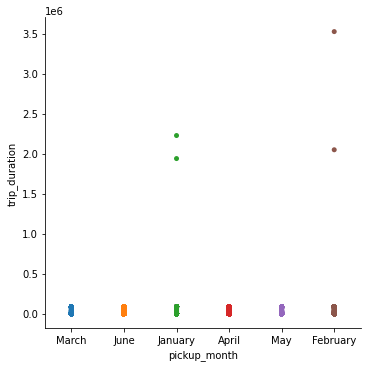

In [42]:
# Trip Duration vs Passenger count
plt.figure(figsize=(10,5))
sns.catplot(x="pickup_month",y="trip_duration",jitter=False,data=df_New_York_Taxi_data)
plt.show()

in feb month a longest ride is taken .

In [43]:
# That longest ride is
df_New_York_Taxi_data_New_York_Taxi_data.loc[df_New_York_Taxi_data['trip_duration'] == df_New_York_Taxi_data.trip_duration.max()]

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_Time,pickup_Date,pickup_month,pickup_day,pickup_period,dropoff_Time,dropoff_Date,dropoff_month,dropoff_day,dropoff_period,time_duration_hr
978383,Creative Mobile Technologies,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,N,3526282,22:46:52,2016-02-13,February,13,PM,18:18:14,2016-03-25,March,25,PM,40 days 19:31:22


#### Is there any relation between E payment method and passenger count.

- behaviour of passenger for payment methods.
- which payment method popular for taxi rides.

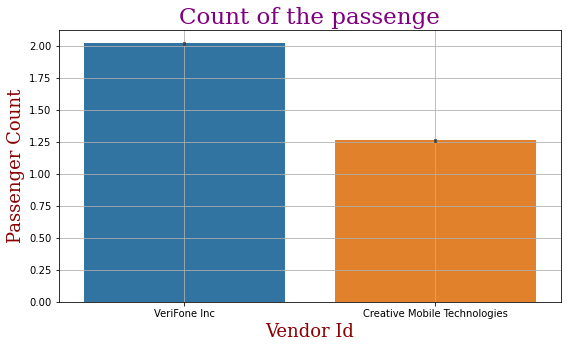

In [45]:
# Plot the relation
plt.figure(figsize=(9,5))
sns.barplot(x=df_New_York_Taxi_data.vendor_id,y=df_New_York_Taxi_data.passenger_count)
plt.xlabel("Vendor Id",fontdict=font)
plt.ylabel("Passenger Count",fontdict=font)
plt.grid()
plt.title("Count of the passenge",fontdict=font_one,loc='center')
plt.show()

- maximun people prefare VeroFone Inc electronic pyement method during travel in texi

#### let's explore the columns for day time (AM,PM)

at which time in a day most ride are taken 

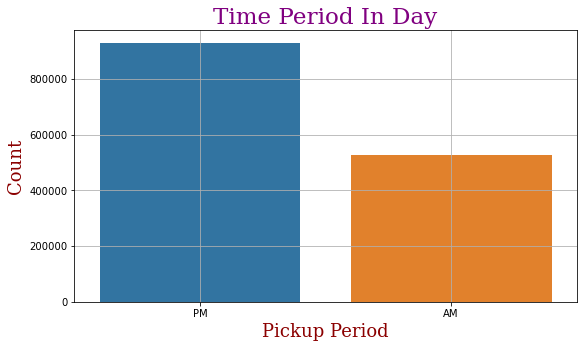

In [48]:
# Plot the same
plt.figure(figsize=(9,5))
sns.countplot(df_New_York_Taxi_data.pickup_period)
plt.xlabel("Pickup Period",fontdict=font)
plt.ylabel("Count",fontdict=font)
plt.grid()
plt.title("Time Period In Day",fontdict=font_one,loc='center')
plt.show()

- Maximum People Travel at noon and evning

#### Find The Wether and time period have any relation ?

- based on months find the wether condion

In [49]:
# for pickup 
df_New_York_Taxi_data['pickup_session'] = df_New_York_Taxi_data['pickup_month']
df_New_York_Taxi_data.pickup_session = df_New_York_Taxi_data.pickup_session.replace({'January':'Winter','February' :'Winter','March':'Winter','April':'Summer','May':'Summer','June':'Summer'})

In [50]:
# for dropoff
df_New_York_Taxi_data['Dropoff_session'] = df_New_York_Taxi_data['dropoff_month']
df_New_York_Taxi_data.Dropoff_session = df_New_York_Taxi_data.Dropoff_session.replace({'January':'Winter','February' :'Winter','March':'Winter','April':'Summer','May':'Summer','June':'Summer','July':'Summer'})

In [51]:
# df After changes
df_New_York_Taxi_data.head(2)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_Time,pickup_Date,pickup_month,pickup_day,pickup_period,dropoff_Time,dropoff_Date,dropoff_month,dropoff_day,dropoff_period,time_duration_hr,pickup_session,Dropoff_session
0,VeriFone Inc,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17:24:55,2016-03-14,March,14,PM,17:32:30,2016-03-14,March,14,PM,0 days 00:07:35,Winter,Winter
1,Creative Mobile Technologies,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,00:43:35,2016-06-12,June,12,AM,00:54:38,2016-06-12,June,12,AM,0 days 00:11:03,Summer,Summer


<Figure size 648x360 with 0 Axes>

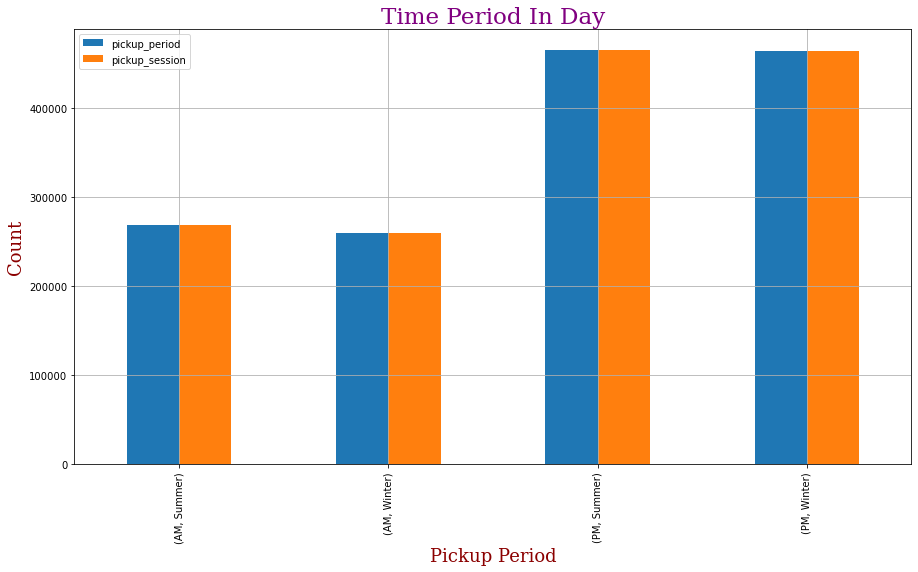

In [53]:
# plot the same
plt.figure(figsize=(9,5))
df_New_York_Taxi_data.groupby(['pickup_period','pickup_session'])['pickup_period','pickup_session'].count().plot.bar()
plt.xlabel("Pickup Period",fontdict=font)
plt.ylabel("Count",fontdict=font)
plt.grid()
plt.title("Time Period In Day",fontdict=font_one,loc='center')
plt.show()

- As we can see in graph there is relation between session and period in day .
- so Maximum people can take the ride at noon specially summer sesion .
- Maximum people take ride in summer due to havey wether condition.

In [54]:
# show in numbers
df_New_York_Taxi_data.groupby(['pickup_period','pickup_session'])['pickup_session'].count()

pickup_period  pickup_session
AM             Summer            268986
               Winter            259941
PM             Summer            465434
               Winter            464218
Name: pickup_session, dtype: int64

# Multi variant Analysis 

#### Passenger Count vs Trip Duration based on Pickup Session

<Figure size 720x360 with 0 Axes>

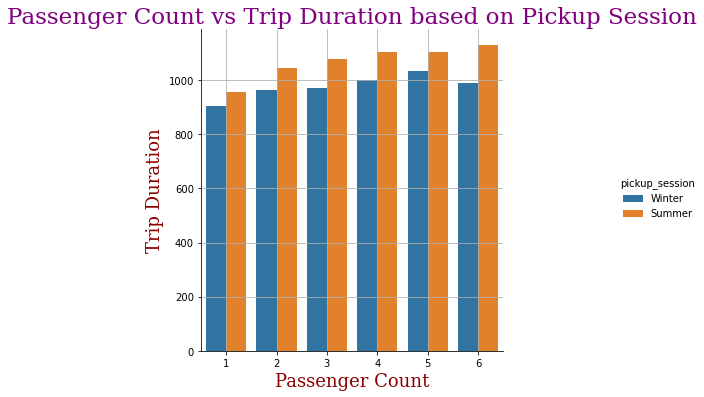

In [55]:
plt.figure(figsize=(10,5))
sns.catplot(x="passenger_count",y="trip_duration",hue="pickup_session",kind="bar",ci=None,data=df_New_York_Taxi_data)
plt.xlabel("Passenger Count",fontdict=font)
plt.ylabel("Trip Duration",fontdict=font)
plt.grid()
plt.title("Passenger Count vs Trip Duration based on Pickup Session",fontdict=font_one,loc='center')
plt.show()

- as we can see here in summer session peopel travel most so here is the possiblity to made some pramosnal offers by texi comapny 

#### Passenger Count vs Trip Duration based on Pickup Period

<Figure size 720x360 with 0 Axes>

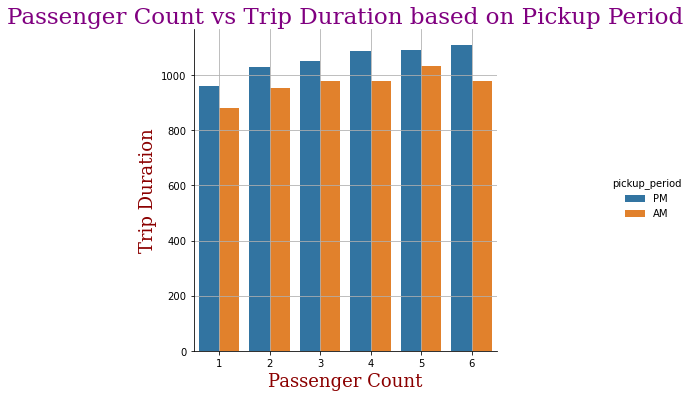

In [57]:
# lets lot the same
plt.figure(figsize=(10,5))
sns.catplot(x="passenger_count",y="trip_duration",hue="pickup_period",kind="bar",ci=None,data=df_New_York_Taxi_data)
plt.xlabel("Passenger Count",fontdict=font)
plt.ylabel("Trip Duration",fontdict=font)
plt.grid()
plt.title("Passenger Count vs Trip Duration based on Pickup Period",fontdict=font_one,loc='center')
plt.show()

In [58]:
df_New_York_Taxi_data.sort_values("pickup_day",ascending=False).groupby('pickup_month').pickup_day.value_counts()

pickup_month  pickup_day
April         9             9796
              16            9602
              2             9323
              15            9276
              8             9215
              14            8846
              30            8780
              29            8732
              7             8668
              1             8638
              28            8558
              6             8468
              5             8389
              10            8378
              23            8351
              20            8341
              12            8301
              13            8296
              17            8254
              21            8090
              3             8084
              22            8062
              19            7990
              27            7949
              4             7890
              26            7858
              24            7529
              11            7485
              18            7459
              25  

- According to this data we can conclude most of ride book on saturday , becase saturday and sunday is holyday .

In [59]:
df_New_York_Taxi_data.sort_values("pickup_day",ascending=False).groupby(['pickup_month','pickup_period']).pickup_day.value_counts().head(60)

pickup_month  pickup_period  pickup_day
April         AM             16            3634
                             2             3618
                             17            3505
                             9             3495
                             10            3397
                             3             3359
                             8             3300
                             15            3287
                             23            3187
                             30            3177
                             22            3141
                             1             3135
                             24            3108
                             14            3106
                             29            3022
                             21            3002
                             7             2977
                             6             2952
                             12            2952
                             13            2905


- as we can see here in April month we have most ride in AM so companies need to in improve the strategy for early Morning And Late Night Trips 

In [60]:
df_New_York_Taxi_data.time_duration_hr.max()

Timedelta('40 days 19:31:22')

In [62]:
df_New_York_Taxi_data.time_duration_hr.sort_values(ascending=False).head()

978383    40 days 19:31:22
924150    25 days 18:46:52
680594    23 days 17:19:38
355003    22 days 10:48:56
1234291    0 days 23:59:52
Name: time_duration_hr, dtype: timedelta64[ns]

In [64]:
df_New_York_Taxi_data.sort_values('time_duration_hr',ascending=False).head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_Time,pickup_Date,pickup_month,pickup_day,pickup_period,dropoff_Time,dropoff_Date,dropoff_month,dropoff_day,dropoff_period,time_duration_hr,pickup_session,Dropoff_session
978383,Creative Mobile Technologies,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,N,3526282,22:46:52,2016-02-13,February,13,PM,18:18:14,2016-03-25,March,25,PM,40 days 19:31:22,Winter,Winter
924150,Creative Mobile Technologies,2016-01-05 06:14:15,2016-01-31 01:01:07,1,-73.983788,40.742325,-73.985489,40.727676,N,2227612,06:14:15,2016-01-05,January,5,AM,01:01:07,2016-01-31,January,31,AM,25 days 18:46:52,Winter,Winter
680594,Creative Mobile Technologies,2016-02-13 22:38:00,2016-03-08 15:57:38,2,-73.921677,40.735252,-73.984749,40.759979,N,2049578,22:38:00,2016-02-13,February,13,PM,15:57:38,2016-03-08,March,8,PM,23 days 17:19:38,Winter,Winter
355003,Creative Mobile Technologies,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.789650,40.643559,-73.956810,40.773087,N,1939736,00:19:42,2016-01-05,January,5,AM,11:08:38,2016-01-27,January,27,AM,22 days 10:48:56,Winter,Winter
1234291,VeriFone Inc,2016-02-15 23:18:06,2016-02-16 23:17:58,2,-73.794525,40.644825,-73.991051,40.755573,N,86392,23:18:06,2016-02-15,February,15,PM,23:17:58,2016-02-16,February,16,PM,0 days 23:59:52,Winter,Winter


- There Are People take ride for 40 days and for alone they traveling but there are only four rides are behaving like that

# Suggesion

After doing all EDA me and my team of stars want to give some off the 
- We need take actions towards pramotional offers for the long drive options,
- need to addup data as age, based on we can easily sagrigate the passenger age mentality.
- Most of the people traval at noon or at evening,need to work on hotspots(places from where most of peoplte take rides)
- Need to approach for two wheeler and other traval options to improve in traval monopoly.
- As we can see people traval for very short time so we need to find is there any time frame is when people take ride for long run with passenger more the 6 or 7.

**I believ That is enough for traval industtries in USA, Now we need t focus on the other things for next two years prediction.**